In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data=pd.read_csv("icc_wc_23_bowl.csv")
data

,player,overs,maidens,runs,wickets,run_rate,0s,4s,6s,wd,nb,team,opponent,innings,match_id
0,Dilshan Madushanka,10.0,0,80,5,8.00,25,8,2,6,0,Sri Lanka,India,1,0
1,Dushmantha Chameera,10.0,2,71,1,7.10,28,8,2,0,0,Sri Lanka,India,1,0
2,Kasun Rajitha,9.0,0,65,0,7.22,25,7,2,1,0,Sri Lanka,India,1,0
3,Angelo Mathews,3.0,0,11,0,3.66,10,1,0,0,0,Sri Lanka,India,1,0
4,Maheesh Theekshana,10.0,0,67,0,6.70,18,5,1,1,0,Sri Lanka,India,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,David Willey,10.0,0,56,3,5.60,37,8,1,2,0,England,Pakistan,2,47
570,Chris Woakes,5.3,0,27,1,4.90,22,5,0,0,0,England,Pakistan,2,47
571,Adil Rashid,10.0,0,55,2,5.50,26,4,1,1,0,England,Pakistan,2,47
572,Gus Atkinson,8.0,0,45,2,5.62,29,3,3,2,0,England,Pakistan,2,47


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    574 non-null    object 
 1   overs     574 non-null    float64
 2   maidens   574 non-null    int64  
 3   runs      574 non-null    int64  
 4   wickets   574 non-null    int64  
 5   run_rate  574 non-null    float64
 6   0s        574 non-null    int64  
 7   4s        574 non-null    int64  
 8   6s        574 non-null    int64  
 9   wd        574 non-null    int64  
 10  nb        574 non-null    int64  
 11  team      574 non-null    object 
 12  opponent  574 non-null    object 
 13  innings   574 non-null    int64  
 14  match_id  574 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 67.4+ KB
None


In [4]:
x=data.drop(['player','wickets','maidens','run_rate','0s','4s','6s','wd','nb','team','opponent','innings','match_id'], axis ='columns')
y=data.iloc[:,4]
x

,overs,runs
0,10.0,80
1,10.0,71
2,9.0,65
3,3.0,11
4,10.0,67
...,...,...
569,10.0,56
570,5.3,27
571,10.0,55
572,8.0,45


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [7]:
pred_y=model.predict(x_test)
pred_x=model.predict(x_train)

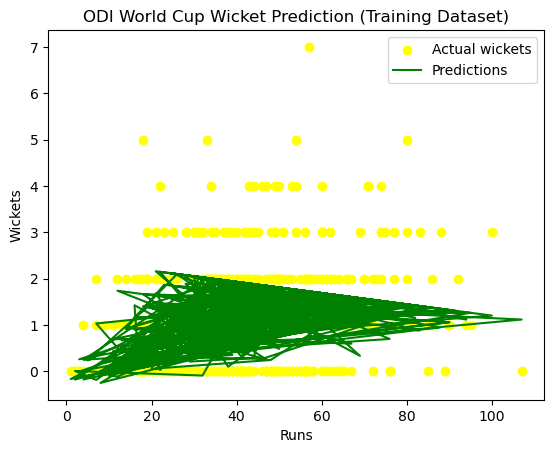

In [8]:
plt.scatter(x_train['runs'], y_train, color='yellow',label="Actual wickets")
plt.plot(x_train['runs'], pred_x, color='green',label="Predictions")
plt.title("ODI World Cup Wicket Prediction (Training Dataset)")  
plt.xlabel("Runs")  
plt.ylabel("Wickets")  
plt.legend()
plt.show()

In [9]:
data.columns[data.isna().any()]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
lireg = LinearRegression()
lireg.fit(x_train, y_train)

LinearRegression()

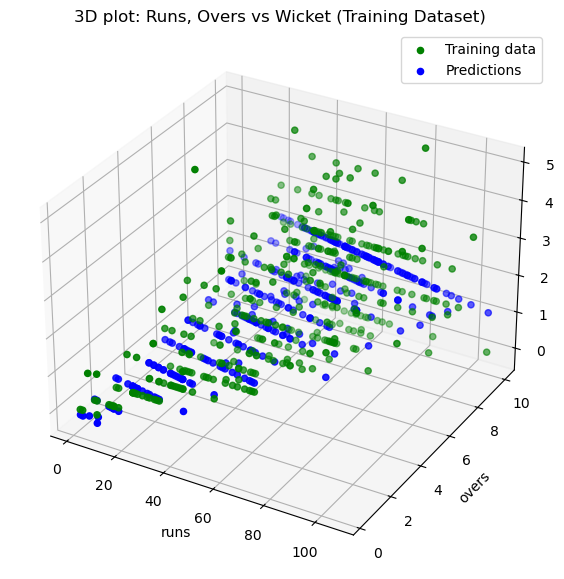

In [10]:
y_predict_train = lireg.predict(x_train)
y_predict_test = lireg.predict(x_test)
# 3D Plot for bedrooms, area, and price
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot
ax.scatter(x_train['runs'], x_train['overs'], y_train, color="green", label="Training data")
ax.scatter(x_train['runs'], x_train['overs'], y_predict_train, color="blue", label="Predictions")

# Labels
ax.set_title("3D plot: Runs, Overs vs Wicket (Training Dataset)")
ax.set_xlabel("runs")
ax.set_ylabel("overs")
ax.set_zlabel("wicket")

plt.legend()
plt.show()

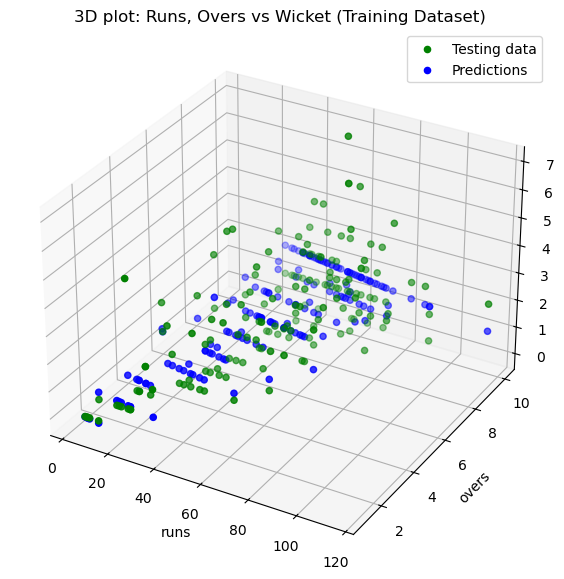

In [12]:
y_predict_train = lireg.predict(x_train)
y_predict_test = lireg.predict(x_test)
# 3D Plot for bedrooms, area, and price
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot
ax.scatter(x_test['runs'], x_test['overs'], y_test, color="green", label="Testing data")
ax.scatter(x_test['runs'], x_test['overs'], y_predict_test, color="blue", label="Predictions")

# Labels
ax.set_title("3D plot: Runs, Overs vs Wicket (Training Dataset)")
ax.set_xlabel("runs")
ax.set_ylabel("overs")
ax.set_zlabel("wicket")

plt.legend()
plt.show()

In [21]:
import speech_recognition as sr
import pyaudio
import nltk as nlpc
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk import ne_chunk
from nltk.chunk import conlltags2tree, tree2conlltags
#speechrecognization
a=sr.Recognizer()
with sr.Microphone() as source:
    print("Speak Now")
    r=a.listen(source )
    print("Thank you for speaking")
    
    try :
        s=a.recognize_google
        print ("Text:" +s (r))
    except:
        print("You are late to speak ")
#
v = s (r)
tokens = word_tokenize(v)
tokens
#
from nltk.stem import PorterStemmer
p= PorterStemmer()
b=s(r)
d=b.split()
d
stemmed_words = [p.stem(word) for word in d]
stemmed_sentence = " ".join(stemmed_words)
stemmed_sentence
#
from nltk.stem import LancasterStemmer
l=LancasterStemmer()
stemmed_word=[l.stem(word)for word in d]
stemmed_word
#
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
lemmatized_tokens

Speak Now
Thank you for speaking
Text:hello hello hello hello hello hello hello hello hello hello hello


['hello',
 'hello',
 'hello',
 'hello',
 'hello',
 'hello',
 'hello',
 'hello',
 'hello',
 'hello',
 'hello']